<a href="https://colab.research.google.com/github/parkseohyeon92784/LDA/blob/main/%EB%89%B4%EC%8A%A4_%ED%97%A4%EB%93%9C%EB%9D%BC%EC%9D%B8_%EC%A0%84%EC%B2%98%EB%A6%AC_%EA%B8%B0%EB%B0%98_%EC%B5%9C%EC%A0%81_LDA_%ED%86%A0%ED%94%BD_%EB%AA%A8%EB%8D%B8%EB%A7%81_%EB%B0%8F_%EA%B0%90%EC%84%B1_%EB%B6%84%EC%84%9D%EC%9D%84_%ED%86%B5%ED%95%9C_%EC%9B%94%EA%B0%84_%ED%8A%B8%EB%A0%8C%EB%93%9C_%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1) Kaggle 라이브러리 설치 및 인증 파일 복사 → 데이터 다운로드 → 압축 해제

# Kaggle 패키지 설치
!pip install -q kaggle

# 인증 폴더 생성 및 kaggle.json 복사
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# News Category Dataset 다운로드
!kaggle datasets download -d rmisra/news-category-dataset

# ZIP 압축 해제
!unzip -q news-category-dataset.zip

# 압축 해제 후 파일 확인
!ls -1 /content



Dataset URL: https://www.kaggle.com/datasets/rmisra/news-category-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/26.5M [00:00<?, ?B/s]
100% 26.5M/26.5M [00:00<00:00, 941MB/s]
kaggle.json
News_Category_Dataset_v3.json
news-category-dataset.zip
sample_data


In [ ]:
import pandas as pd

# JSON 파일 로드
json_path = '/content/News_Category_Dataset_v3.json'
news_df = pd.read_json(json_path, lines=True)

# 기본 정보 출력
print("전체 데이터 크기:", news_df.shape)
print(news_df.head())
print("\n컬럼 목록:", news_df.columns.tolist())


전체 데이터 크기: (209527, 6)
                                                link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  

<ipython-input-4-1bd2e3306c08>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-4-1bd2e3306c08>:15: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1bd2e3306c08>:15: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1bd2e3306c08>:15: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1bd2e3306c08>:15: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1bd2e3306c08>:15: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1bd2e3306c08>:15: UserWarning: Glyph 53580 (\N{H

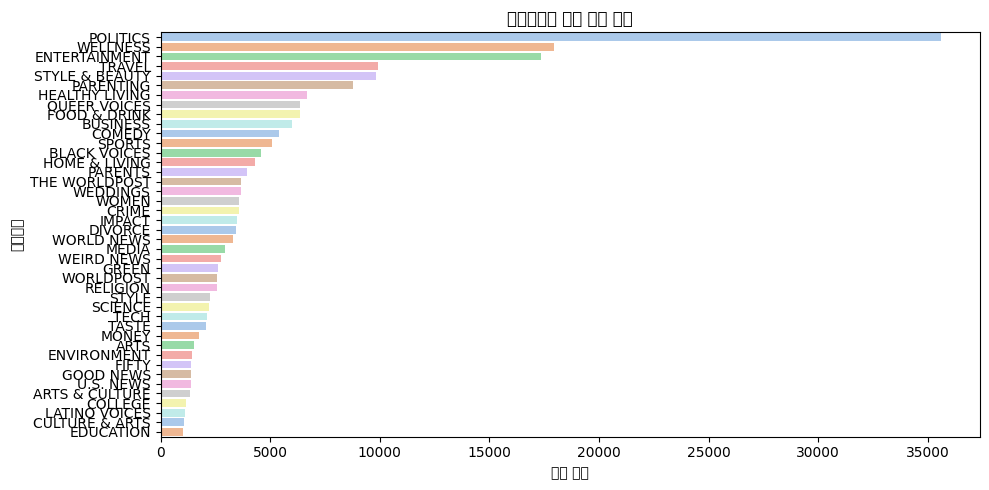

<ipython-input-4-1bd2e3306c08>:29: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1bd2e3306c08>:29: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1bd2e3306c08>:29: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1bd2e3306c08>:29: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1bd2e3306c08>:29: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1bd2e3306c08>:29: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1bd2e3306c08>:29: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input

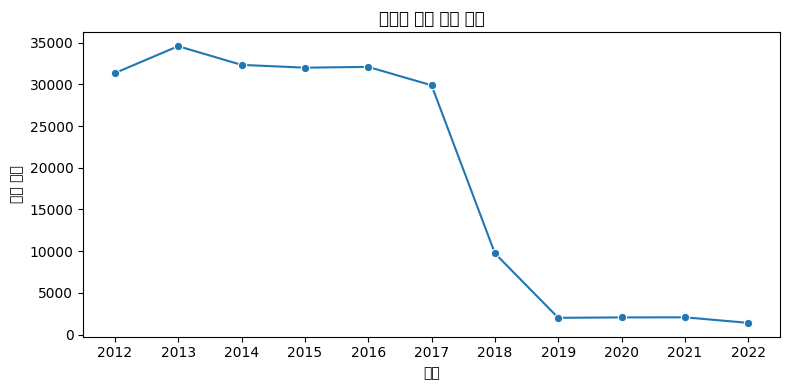

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) 카테고리별 기사 개수 분포
plt.figure(figsize=(10, 5))
sns.countplot(
    y='category',
    data=news_df,
    order=news_df['category'].value_counts().index,
    palette='pastel'
)
plt.title('카테고리별 기사 개수 분포')
plt.xlabel('기사 개수')
plt.ylabel('카테고리')
plt.tight_layout()
plt.show()

# 2) 연도별 기사 개수 변화
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['year'] = news_df['date'].dt.year
year_counts = news_df['year'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.title('연도별 기사 개수 변화')
plt.xlabel('연도')
plt.ylabel('기사 개수')
plt.xticks(year_counts.index)
plt.tight_layout()
plt.show()


<ipython-input-5-3c435762b38c>:22: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-3c435762b38c>:22: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-3c435762b38c>:22: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-3c435762b38c>:22: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-3c435762b38c>:22: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-3c435762b38c>:22: UserWarning: Glyph 54756 (\N{HANGUL SYLLABLE HE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-3c435762b38c>:22: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-

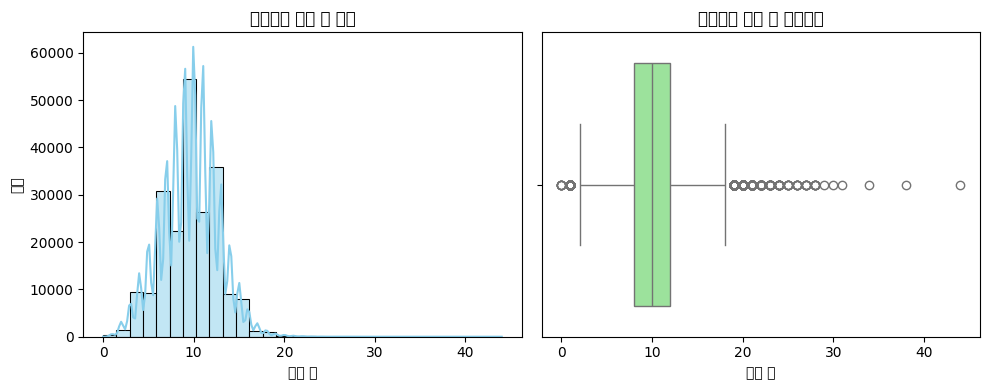

전처리 전 헤드라인 상위 토큰 20개:
 [('the', 61815), ('to', 52578), ('of', 33313), ('a', 32060), ('in', 31786), ('for', 25369), ('and', 23806), ('is', 17752), ('on', 17280), ('with', 13763), ('you', 10689), ('your', 10613), ('trump', 9749), ('how', 9410), ('at', 9045), ('new', 8843), ('from', 8575), ('(photos)', 8461), ('this', 7974), ('are', 7434)]


In [ ]:
from collections import Counter

# 헤드라인 단어 수 계산 → 'headline_len' 컬럼 생성
news_df['headline_len'] = news_df['headline'].apply(lambda x: len(x.split()))

# 히스토그램 + 박스플롯
plt.figure(figsize=(10, 4))

# 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(news_df['headline_len'], bins=30, kde=True, color='skyblue')
plt.title('헤드라인 단어 수 분포')
plt.xlabel('단어 수')
plt.ylabel('빈도')

# 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(x=news_df['headline_len'], color='lightgreen')
plt.title('헤드라인 단어 수 박스플롯')
plt.xlabel('단어 수')

plt.tight_layout()
plt.show()

# 전처리 전 상위 토큰 20개 (소문자화 → 공백 분리)
all_tokens = ' '.join(news_df['headline']).lower().split()
top_20 = Counter(all_tokens).most_common(20)
print("전처리 전 헤드라인 상위 토큰 20개:\n", top_20)


In [ ]:
# 6) NLTK 설치 및 불용어 사전 다운로드
!pip install -q nltk


In [ ]:
import nltk

# stopwords만 다운로드 (TreebankWordTokenizer는 별도 다운로드 불필요)
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TreebankWordTokenizer

# TreebankWordTokenizer, 불용어 세트, 어간 추출기 생성
tokenizer = TreebankWordTokenizer()
stop_words = set(stopwords.words('english'))
stemmer   = PorterStemmer()

# 전처리 함수 정의
def preprocess_text(doc):
    # 1) 소문자화
    doc = doc.lower()
    # 2) 알파벳(a-z)과 공백만 남기기
    doc = re.sub(r'[^a-z\s]', '', doc)
    # 3) 토큰화
    tokens = tokenizer.tokenize(doc)
    # 4) 불용어 제거 및 5) 어간 추출
    filtered = [
        stemmer.stem(token)
        for token in tokens
        if (token not in stop_words) and token.isalpha()
    ]
    return ' '.join(filtered)

# 전처리 함수 테스트 예시
sample = "Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters"
print(preprocess_text(sample))


million american roll sleev omicrontarget covid booster


In [ ]:
# 9) ‘clean_headline’ 컬럼 생성 및 전처리 결과 확인
news_df['clean_headline'] = news_df['headline'].apply(preprocess_text)

# 전처리 전/후 샘플 확인 (첫 두 개 헤드라인)
for i in [0, 1]:
    print(f"원본 헤드라인 예시 {i}:")
    print(news_df['headline'].iloc[i])
    print(f"\n전처리 후 clean_headline 예시 {i}:")
    print(news_df['clean_headline'].iloc[i]
    print("\n" + "-"*50 + "\n")


원본 헤드라인 예시 0:
Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters

전처리 후 clean_headline 예시 0:
million american roll sleev omicrontarget covid booster

--------------------------------------------------

원본 헤드라인 예시 1:
American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video

전처리 후 clean_headline 예시 1:
american airlin flyer charg ban life punch flight attend video

--------------------------------------------------



In [ ]:
# 10) CountVectorizer로 문서-단어 행렬(DTM) 생성
from sklearn.feature_extraction.text import CountVectorizer

# 최소 df=15, 최대 df=0.50 필터링 설정
vectorizer = CountVectorizer(
    min_df=15,
    max_df=0.50,
    token_pattern=r'(?u)\b[a-zA-Z]+\b'
)

# 전처리된 헤드라인 리스트
documents = news_df['clean_headline'].tolist()

# 문서-단어 행렬 생성
dtm = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

# 결과 확인
print("문서-단어 행렬(shape):", dtm.shape)
print("단어 수(컬럼 개수):", len(feature_names))


문서-단어 행렬(shape): (209527, 8227)
단어 수(컬럼 개수): 8227


In [ ]:
# 11) LatentDirichletAllocation 모델 학습 (토픽 수 = 7)
from sklearn.decomposition import LatentDirichletAllocation

# LDA 모델 생성 (토픽 수는 7, 반복 횟수 10, batch 방식)
lda_model = LatentDirichletAllocation(
    n_components=7,
    max_iter=10,
    learning_method='batch',
    random_state=42
)

# 모델 학습
lda_model.fit(dtm)

# 학습 완료 메시지
print("LDA 학습 완료: 토픽 수 =", lda_model.n_components)


LDA 학습 완료: 토픽 수 = 7


In [ ]:
# 12) 토픽별 상위 10개 키워드 출력
def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_indices = topic.argsort()[::-1][:n_top_words]
        top_terms = [feature_names[i] for i in top_indices]
        print(f"토픽 #{topic_idx+1}: {'  '.join(top_terms)}")

print_top_words(lda_model, feature_names, n_top_words=10)


토픽 #1: clinton  hillari  court  photo  white  sander  thing  day  berni  american
토픽 #2: health  could  studi  year  america  care  time  us  world  state
토픽 #3: like  day  need  know  love  thing  dont  photo  look  reason
토픽 #4: man  kill  polic  say  shoot  death  offic  die  dead  woman
토픽 #5: photo  new  week  video  women  babi  show  fashion  beauti  style
토픽 #6: trump  donald  say  gop  obama  presid  new  us  call  republican
토픽 #7: way  make  photo  wed  day  kid  get  gay  marriag  life


In [ ]:
# 13) 'year_month' 컬럼 생성 및 'dominant_topic' 계산

# 1) 'year_month' 생성 (YYYY-MM)
news_df['year_month'] = news_df['date'].dt.to_period('M').astype(str)

# 2) 문서별 토픽 분포 계산 (각 문서가 속한 토픽 확률)
doc_topic_dist = lda_model.transform(dtm)

# 3) 확률이 가장 높은 토픽(0-based 인덱스)을 찾아 +1 → 1-based 토픽 번호
dominant_topic = doc_topic_dist.argmax(axis=1) + 1

# 4) news_df에 'dominant_topic' 컬럼 추가
news_df['dominant_topic'] = dominant_topic

# 결과 확인 (첫 5개 행)
print(news_df[['clean_headline', 'year_month', 'dominant_topic']].head())


                                      clean_headline year_month  \
0  million american roll sleev omicrontarget covi...    2022-09   
1  american airlin flyer charg ban life punch fli...    2022-09   
2                   funniest tweet cat dog week sept    2022-09   
3                    funniest tweet parent week sept    2022-09   
4  woman call cop black birdwatch lose lawsuit ex...    2022-09   

   dominant_topic  
0               2  
1               4  
2               5  
3               5  
4               4  


In [ ]:
# 14) 월별·토픽별 문서 수 집계 및 비율 계산
import pandas as pd

# (1) pivot_table로 'year_month' × 'dominant_topic'별 건수 집계
count_table = news_df.pivot_table(
    index='year_month',
    columns='dominant_topic',
    values='headline',
    aggfunc='count',
    fill_value=0
)

# (2) 전체 월별 문서 수 계산
count_table['total_docs'] = count_table.sum(axis=1)

# (3) 토픽별 비율 컬럼 생성 (topic_1_ratio ~ topic_7_ratio)
for topic_num in range(1, lda_model.n_components + 1):
    count_table[f'topic_{topic_num}_ratio'] = (
        count_table[topic_num] / count_table['total_docs']
    )

# 상위 10개 월 데이터 확인
count_table.head(10)


dominant_topic,1,2,3,4,5,6,7,total_docs,topic_1_ratio,topic_2_ratio,topic_3_ratio,topic_4_ratio,topic_5_ratio,topic_6_ratio,topic_7_ratio
year_month,,,,,,,,,,,,,,,
2012-01,32,44,53,36,78,17,71,331,0.096677,0.132931,0.160121,0.108761,0.235650,0.051360,0.214502
2012-02,233,392,433,246,769,90,530,2693,0.086521,0.145563,0.160787,0.091348,0.285555,0.033420,0.196807
2012-03,257,504,440,234,728,126,591,2880,0.089236,0.175000,0.152778,0.081250,0.252778,0.043750,0.205208
2012-04,261,459,505,195,616,123,610,2769,0.094258,0.165764,0.182376,0.070423,0.222463,0.044420,0.220296
2012-05,251,434,642,226,640,113,593,2899,0.086582,0.149707,0.221456,0.077958,0.220766,0.038979,0.204553
2012-06,250,457,565,237,536,118,629,2792,0.089542,0.163682,0.202364,0.084885,0.191977,0.042264,0.225287
2012-07,267,490,461,256,600,137,657,2868,0.093096,0.170851,0.160739,0.089261,0.209205,0.047768,0.229079
2012-08,244,498,510,214,633,112,650,2861,0.085285,0.174065,0.178259,0.074799,0.221251,0.039147,0.227193
2012-09,238,465,447,229,655,155,587,2776,0.085735,0.167507,0.161023,0.082493,0.235951,0.055836,0.211455


<ipython-input-15-c992101b4cca>:26: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-c992101b4cca>:26: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-c992101b4cca>:26: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-c992101b4cca>:26: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-c992101b4cca>:26: UserWarning: Glyph 54589 (\N{HANGUL SYLLABLE PIG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-c992101b4cca>:26: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-c992101b4cca>:26: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipytho

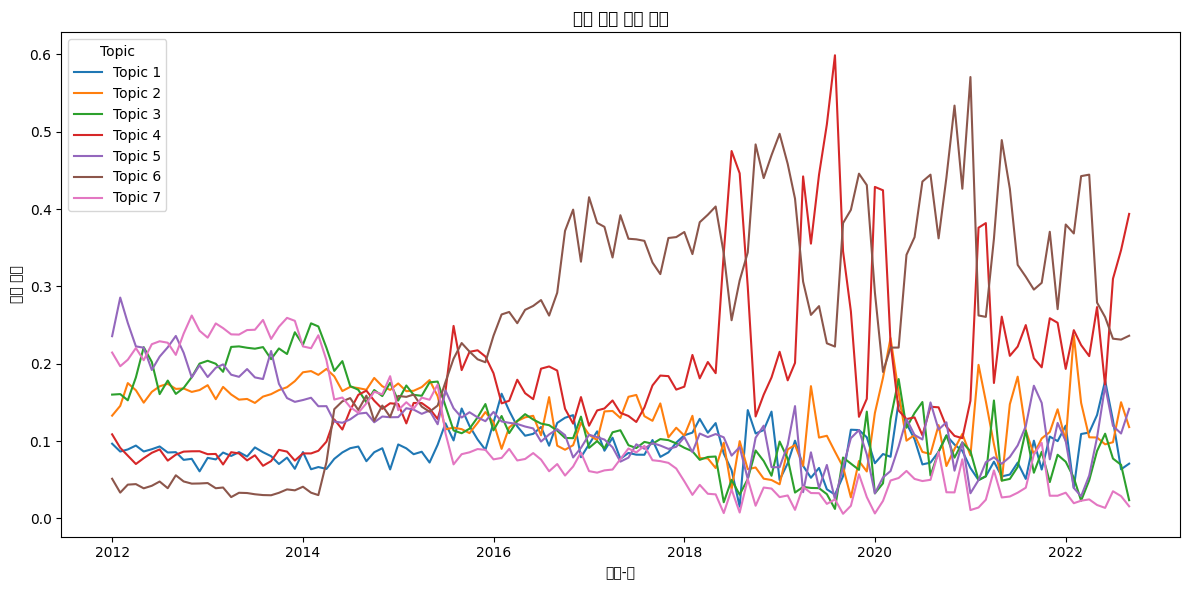

In [ ]:
# 15) 월별 토픽 비율 시계열 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 비율 컬럼 리스트
ratio_cols = [f'topic_{i}_ratio' for i in range(1, lda_model.n_components + 1)]

# 문자열 YYYY-MM → datetime YYYY-MM-01 인덱스로 변환
ts_df = count_table[ratio_cols].copy()
ts_df.index = pd.to_datetime(ts_df.index + '-01')

# 선 그래프 그리기
plt.figure(figsize=(12, 6))
for col in ratio_cols:
    sns.lineplot(
        data=ts_df,
        x=ts_df.index,
        y=col,
        label=col.replace('_ratio', '').replace('topic_', 'Topic ')
    )

plt.title('월별 토픽 비율 변화')
plt.xlabel('연도-월')
plt.ylabel('토픽 비율')
plt.legend(title='Topic')
plt.tight_layout()
plt.show()


In [ ]:
# 16) 전처리된 DataFrame 및 월별 토픽 비율 데이터 CSV로 저장

# (1) 전처리된 전체 데이터 저장
news_df.to_csv('news_category_preprocessed.csv', index=False, encoding='utf-8-sig')
print("전처리된 데이터 저장 완료 → news_category_preprocessed.csv")

# (2) 월별 토픽 비율 테이블 저장
count_table.to_csv('topic_ratio_by_month.csv', encoding='utf-8-sig')
print("월별 토픽 비율 데이터 저장 완료 → topic_ratio_by_month.csv")


전처리된 데이터 저장 완료 → news_category_preprocessed.csv
월별 토픽 비율 데이터 저장 완료 → topic_ratio_by_month.csv


In [ ]:
# 18) TextBlob 설치 (간단한 감성 분석)
!pip install -q textblob


<ipython-input-22-5d823eda063c>:34: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-5d823eda063c>:34: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-5d823eda063c>:34: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-5d823eda063c>:34: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-5d823eda063c>:34: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-5d823eda063c>:34: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-5d823eda063c>:34: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

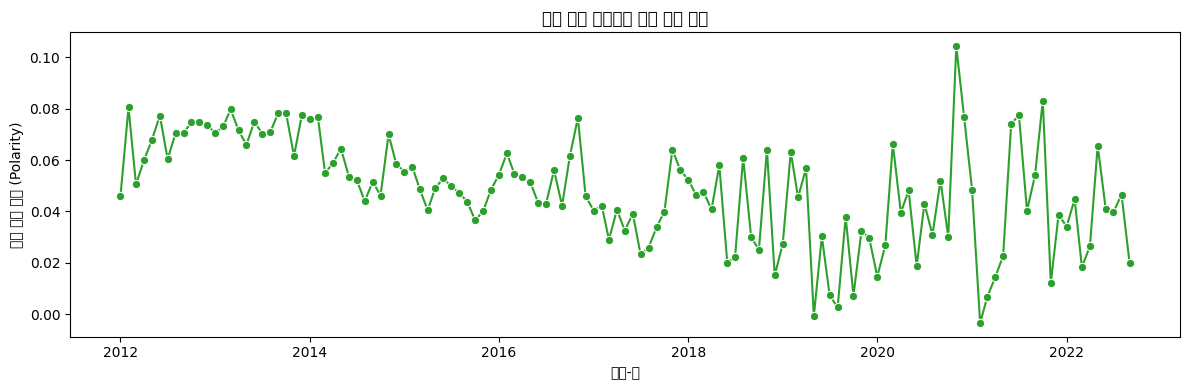

In [ ]:
# 18) 감성 분석 Sentiment Score 부여
from textblob import TextBlob

def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

# news_df에는 이미 'clean_headline'과 'year_month'가 있다고 가정합니다.
news_df['sentiment'] = news_df['clean_headline'].apply(get_sentiment_polarity)

# 월별 평균 감성 점수 계산
sentiment_monthly = (
    news_df
    .groupby('year_month')['sentiment']
    .mean()
    .reset_index()
)
sentiment_monthly['year_month'] = pd.to_datetime(sentiment_monthly['year_month'] + '-01')

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
sns.lineplot(
    data=sentiment_monthly,
    x='year_month',
    y='sentiment',
    marker='o',
    color='tab:green'
)
plt.title('월별 평균 헤드라인 감성 점수 변화')
plt.xlabel('연도-월')
plt.ylabel('평균 감성 점수 (Polarity)')
plt.tight_layout()
plt.show()


In [ ]:
# “year_month” 형식이 서로 다르기 때문에(하나는 문자열, 하나는 datetime) 발생한 오류입니다.
# 아래와 같이 'count_table'의 year_month를 datetime으로 변환한 뒤 병합하면 해결됩니다.

# 19-2) 월별 토픽 비율 + 평균 감성 점수 결합 테이블 저장 (수정된 병합 코드)

# (1) count_table을 DataFrame 형태로 변환
count_df = count_table.reset_index()  # 'year_month'는 문자열 형태

# (2) count_df의 'year_month'를 datetime으로 변환 (“YYYY-MM-01”)
count_df['year_month'] = pd.to_datetime(count_df['year_month'] + '-01')

# (3) sentiment_monthly는 이미 datetime 형태이므로 병합 준비 완료
#     (sentiment_monthly 컬럼: 'year_month'(datetime), 'sentiment'(float))

# (4) merge 수행 (left_on, right_on 모두 datetime)
sentiment_ratio_df = pd.merge(
    count_df,
    sentiment_monthly.rename(columns={'sentiment': 'avg_sentiment'}),
    how='left',
    on='year_month'
)

# (5) 결과 저장
sentiment_ratio_df.to_csv('topic_sentiment_by_month.csv', index=False, encoding='utf-8-sig')
print("토픽 비율 + 감성 점수 결합 데이터 저장 완료 → topic_sentiment_by_month.csv")


토픽 비율 + 감성 점수 결합 데이터 저장 완료 → topic_sentiment_by_month.csv


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True